
# Investigating bias in a recruitment model



## Introduction

This dataset contains the recruitment decisions of a company for approximately 1000 applicants based on a number of criteria listed on their CVs.
The recruitment decisions of the company show bias.

The dataset contains three protected characteristics which are gender, age and nationality.

Utilizing the decision tree supervised learning technique, the aim is to build a prediction model and investigate bias in the model using the *gender-protected characteristic*.


This dataset was obtained from [Kaggle](https://www.kaggle.com/datasets/ictinstitute/utrecht-fairness-recruitment-dataset).

_Please refer to the requirements.txt file for a comprehensive list of Python libraries utilized in this project, along with their respective versions._

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# classifiers and predictions
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier


%matplotlib inline

In [2]:
# loading the dataset
data = pd.read_csv('data.csv')
data.head()

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,decision
0,x6709g,female,22,Dutch,Tennis,68,False,True,False,False,2,True,master,True
1,x9205a,female,27,German,Chess,70,False,True,False,False,1,True,master,True
2,x7731c,male,27,Dutch,Football,65,False,True,False,False,1,True,master,True
3,x7929d,female,24,Dutch,Tennis,66,True,True,False,True,2,True,bachelor,False
4,x6579f,male,27,Dutch,Football,55,True,False,False,True,3,False,phd,False


In [3]:
data.tail()

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,decision
912,x7640e,female,28,Dutch,Running,63,False,False,False,False,0,False,master,False
913,x3310f,female,27,Dutch,Tennis,62,False,False,False,True,2,True,bachelor,False
914,x1202g,male,24,Belgian,Rugby,60,True,False,False,True,2,False,bachelor,False
915,x1263d,female,22,Dutch,Tennis,66,False,True,False,False,1,True,bachelor,False
916,x2396a,male,28,Dutch,Football,58,False,False,False,False,1,False,bachelor,False



## Structure Investigation

In [4]:
# size of the dataset
data.shape
print('There are {} rows and {} columns in the dataset.'.format(data.shape[0], data.shape[1]))

There are 917 rows and 14 columns in the dataset.


In [5]:
# getting more information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     917 non-null    object
 1   gender                 917 non-null    object
 2   age                    917 non-null    int64 
 3   nationality            917 non-null    object
 4   sport                  917 non-null    object
 5   ind-university_grade   917 non-null    int64 
 6   ind-debateclub         917 non-null    bool  
 7   ind-programming_exp    917 non-null    bool  
 8   ind-international_exp  917 non-null    bool  
 9   ind-entrepeneur_exp    917 non-null    bool  
 10  ind-languages          917 non-null    int64 
 11  ind-exact_study        917 non-null    bool  
 12  ind-degree             917 non-null    object
 13  decision               917 non-null    bool  
dtypes: bool(6), int64(3), object(5)
memory usage: 62.8+ KB



_Description of dataset columns_

**Id** - a unique identifier.

**gender** - male, female, or other.

**age** - age in years.

**nationality** - Current nationality, Dutch, German or Belgian.

**sport** - The first/main sport the candidate listed on their CV.

**ind-university_grade** - University grade (percentage) of the candidate.

**ind-debateclub** - Whether the candidate participated in a debating / social club.

**ind-programming_exp** - Whether the candidate has programming experience.

**ind-international_exp** - Whether the candidate has international experience.

**ind-entrepeneur_exp** - Whether the candidate has run their own company.

**ind-languages** - number of additional languages 0,1,2,3,4 spoken fluently by candidate.

**ind-exact_study** - whether they studied physics, engineering or other science-oriented study.

**ind-degree** - Highest completed degree. phd, bachelor or master level.

**decision** - target, to be predicted. whether the candidate was hired.

### Structure of non-numerical features

In [6]:
# Display non-numerical features
data.select_dtypes(exclude="number").head()

,Id,gender,nationality,sport,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-exact_study,ind-degree,decision
0,x6709g,female,Dutch,Tennis,False,True,False,False,True,master,True
1,x9205a,female,German,Chess,False,True,False,False,True,master,True
2,x7731c,male,Dutch,Football,False,True,False,False,True,master,True
3,x7929d,female,Dutch,Tennis,True,True,False,True,True,bachelor,False
4,x6579f,male,Dutch,Football,True,False,False,True,False,phd,False


In [7]:
# investigating unique values for each non-numerical feature the frequency
data.describe(exclude="number")

,Id,gender,nationality,sport,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-exact_study,ind-degree,decision
count,917,917,917,917,917,917,917,917,917,917,917
unique,917,2,3,8,2,2,2,2,2,3,2
top,x6709g,male,Dutch,Football,False,False,False,False,False,bachelor,False
freq,1,499,742,197,715,607,710,731,479,443,666


### Structure of numerical features

In [8]:
# display numerical features
data.select_dtypes(include="number").head()

,age,ind-university_grade,ind-languages
0,22,68,2
1,27,70,1
2,27,65,1
3,24,66,2
4,27,55,3


In [9]:
# displaying statistical summary for numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,917.0,26.210469,2.854243,21.0,24.0,26.0,28.0,32.0
ind-university_grade,917.0,62.544166,5.898103,48.0,58.0,63.0,67.0,78.0
ind-languages,917.0,1.319520,0.849724,0.0,1.0,1.0,2.0,3.0


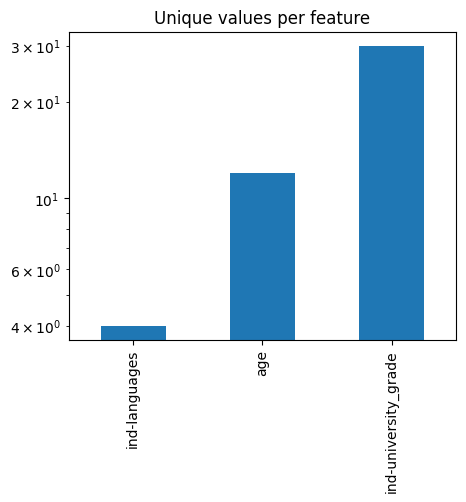

In [10]:
# showing unique entries in each numerical feature
unique_values = data.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.bar(logy=True, figsize=(5, 4), title="Unique values per feature");

## Quality Investigation and Data Preprocessing

### Duplicate entries

In [11]:
# Checking for duplicates(entries representing the same sample points multiple times)
# first we ignore the unique identifier, Id.
n_duplicates = data.drop(labels=["Id"], axis=1).duplicated().sum()
print("There are {} duplicates in the dataset.".format(n_duplicates))

There are 11 duplicates in the dataset.


In [12]:
# drop duplicate entries, ignore unique identifier column, Id
other_cols = data.drop(labels=["Id"], axis=1).columns

# Drop duplicates based on other columns ignoring the unique id column
data = data.drop_duplicates(subset=other_cols)
print('After dropping duplicate entries, there are now {} rows and {} columns in the dataset.'.format(data.shape[0], data.shape[1]))

After dropping duplicate entries, there are now 906 rows and 14 columns in the dataset.


### Missing Values

In [13]:
#checking for missing values
data.isnull().sum()

Id                       0
gender                   0
age                      0
nationality              0
sport                    0
ind-university_grade     0
ind-debateclub           0
ind-programming_exp      0
ind-international_exp    0
ind-entrepeneur_exp      0
ind-languages            0
ind-exact_study          0
ind-degree               0
decision                 0
dtype: int64

### Unwanted Entries and Recording Errors for Numerical Features

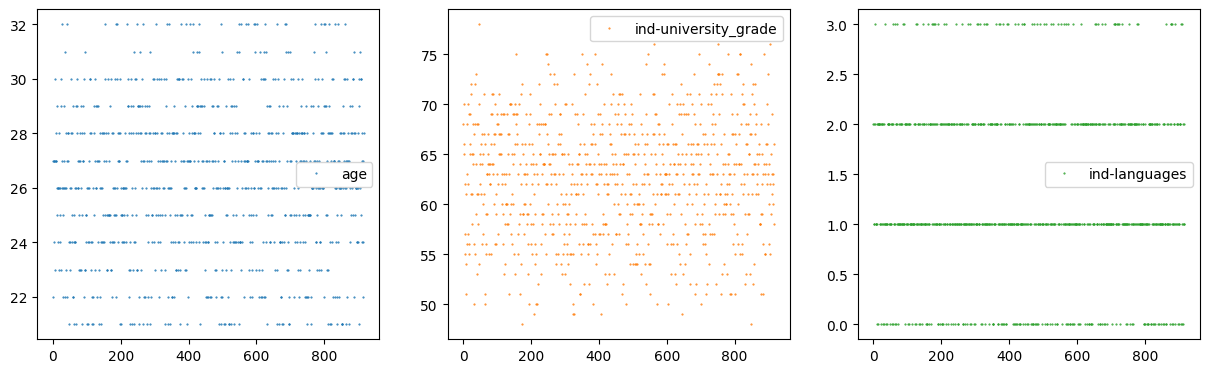

In [14]:
#plotting the global view of the dataset for the 3 numerical features
data.plot(lw=0, marker=".", subplots=True, layout=(6, 3), figsize=(15, 30), markersize=1);

## Exploratory Data Analysis

In [15]:
#listing categorical columns
cat_columns = data.drop('Id', axis=1).select_dtypes(include=['object', 'bool']).columns
print("There are {} categorical columns.".format(len(cat_columns)))

There are 10 categorical columns.


In [16]:
#checking the number of unique values for each categorical columns and the values
for i in cat_columns:
    print(f'For {i}: ')
    print("There are {} unique values".format(data[i].nunique()))
    print("The unique values are: {}".format(data[i].unique()))
    print("The frequency of each unique value: \n{}\n".format(data[i].value_counts()))
    print("_________________________________________")

For gender: 
There are 2 unique values
The unique values are: ['female' 'male']
The frequency of each unique value: 
gender
male      495
female    411
Name: count, dtype: int64

_________________________________________
For nationality: 
There are 3 unique values
The unique values are: ['Dutch' 'German' 'Belgian']
The frequency of each unique value: 
nationality
Dutch      731
German      89
Belgian     86
Name: count, dtype: int64

_________________________________________
For sport: 
There are 8 unique values
The unique values are: ['Tennis' 'Chess' 'Football' 'Swimming' 'Rugby' 'Running' 'Golf' 'Cricket']
The frequency of each unique value: 
sport
Football    195
Rugby       161
Swimming    158
Tennis       90
Chess        82
Cricket      81
Golf         72
Running      67
Name: count, dtype: int64

_________________________________________
For ind-debateclub: 
There are 2 unique values
The unique values are: [False  True]
The frequency of each unique value: 
ind-debateclub
False  

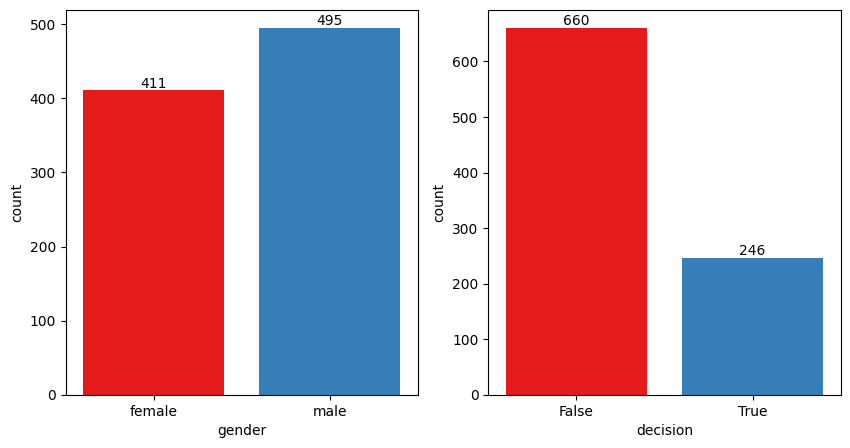

In [17]:
# visualizing the protected feature (gender) and the target (decision)
fig, ax = plt.subplots(ncols = 2, figsize=(10, 5))
sns.countplot(x='gender', data=data, saturation = 1, palette = "Set1", ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].bar_label(ax[0].containers[1])
sns.countplot(x='decision', data=data, saturation = 1, palette = "Set1", ax=ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].bar_label(ax[1].containers[1])
fig.show()

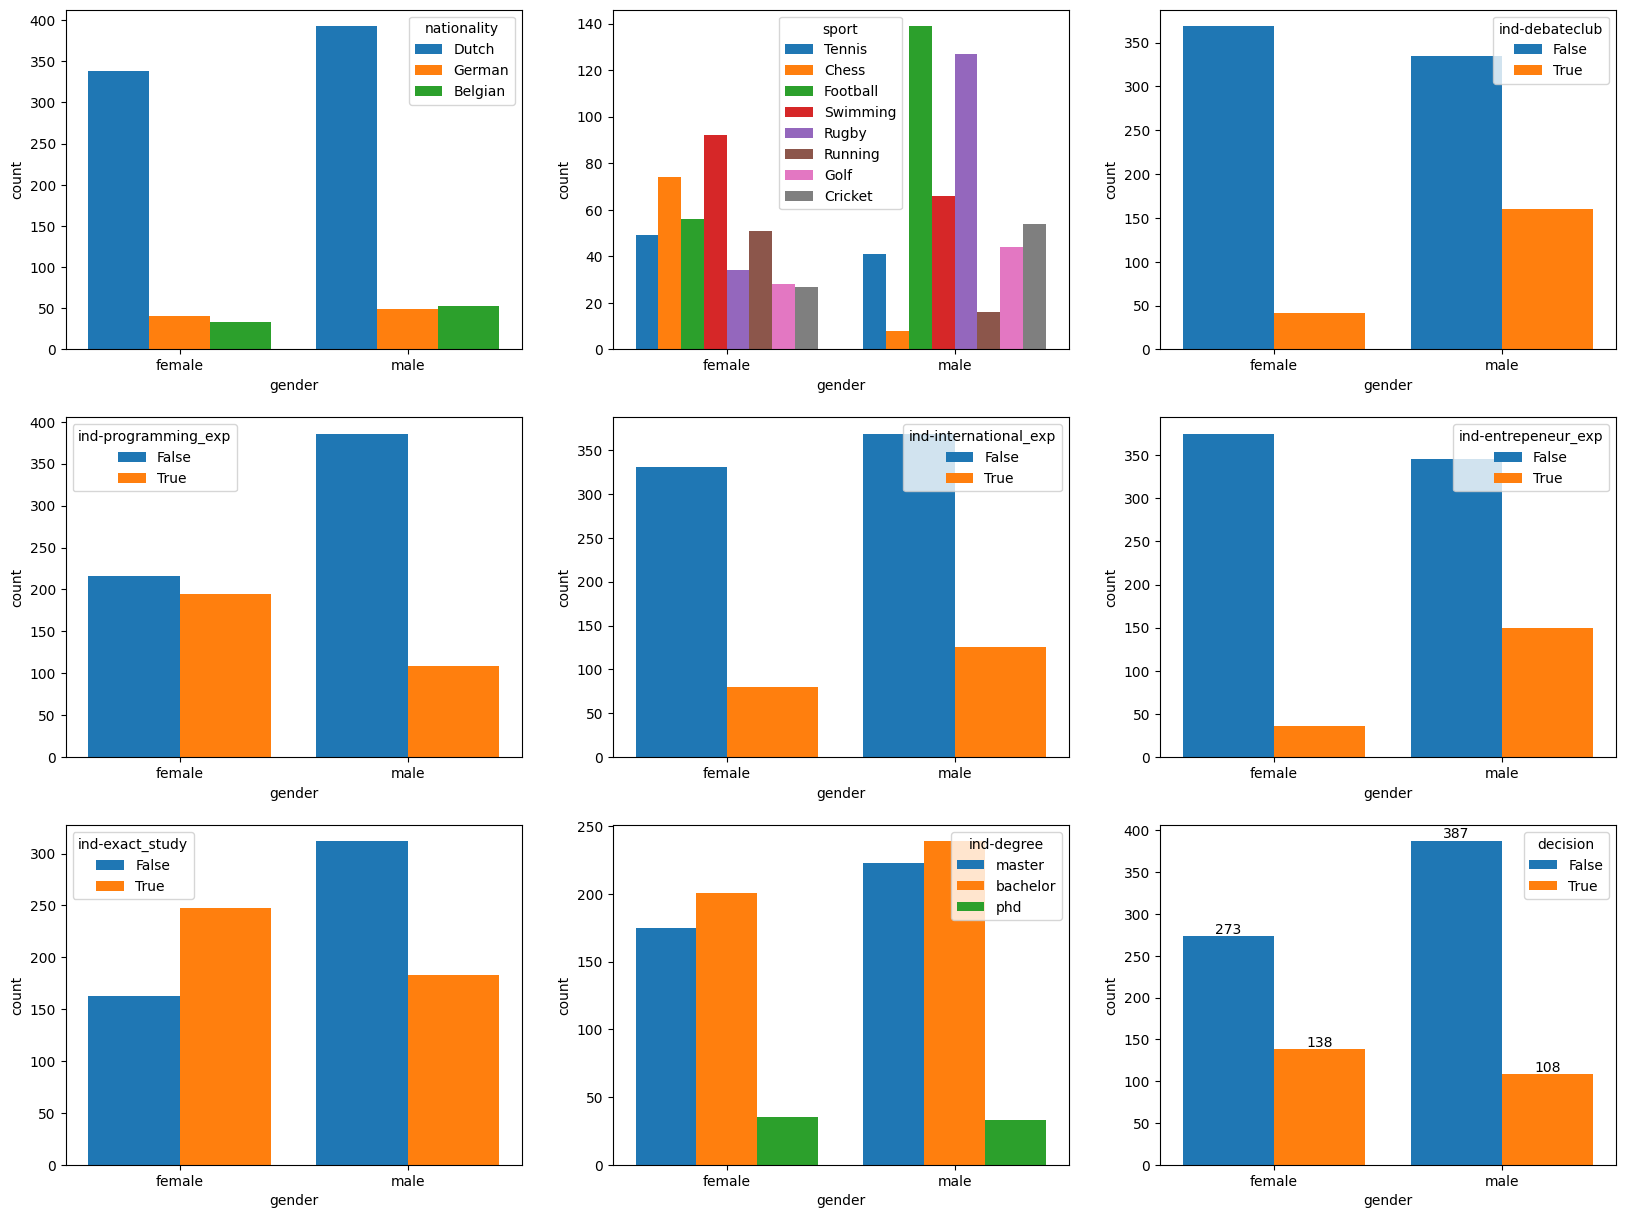

In [18]:
# Visualizing feature distribution
# showing the counts of observations in each categorical bin relative to the gender-protected characteristic
columns = data.drop(['Id', 'gender'], axis=1).select_dtypes(exclude='number').columns
num_plots = len(columns)
num_cols = 3
num_rows = num_plots // num_cols + int(num_plots % num_cols > 0)
fig, ax = plt.subplots(num_rows, num_cols, figsize=(20, 15))
ax = ax.flatten()

for i, col in enumerate(columns):
    sns.countplot(x='gender', hue=col, saturation = 1, data=data, ax=ax[i])
    if(i == len(columns) - 1):
        ax[i].bar_label(ax[i].containers[0])
        ax[i].bar_label(ax[i].containers[1])
fig.show()

In [19]:
#listing numerical columns
num_columns = data.drop('Id', axis=1).select_dtypes(include='number').columns
print("There are {} numerical columns.".format(len(num_columns)))

There are 3 numerical columns.


In [20]:
#checking the number of unique values for each numerical columns and the values
for i in num_columns:
    print(f'For {i}: ')
    print("There are {} unique values".format(data[i].nunique()))
    print("The unique values are: {}\n".format(data[i].unique()))
    #print("The frequency of each unique value: \n{}\n".format(data[i].value_counts()))

For age: 
There are 12 unique values
The unique values are: [22 27 24 23 30 28 26 25 29 32 31 21]

For ind-university_grade: 
There are 30 unique values
The unique values are: [68 70 65 66 55 57 62 54 61 51 63 56 69 71 72 58 64 50 67 59 73 53 78 60
 75 48 49 52 74 76]

For ind-languages: 
There are 4 unique values
The unique values are: [2 1 3 0]



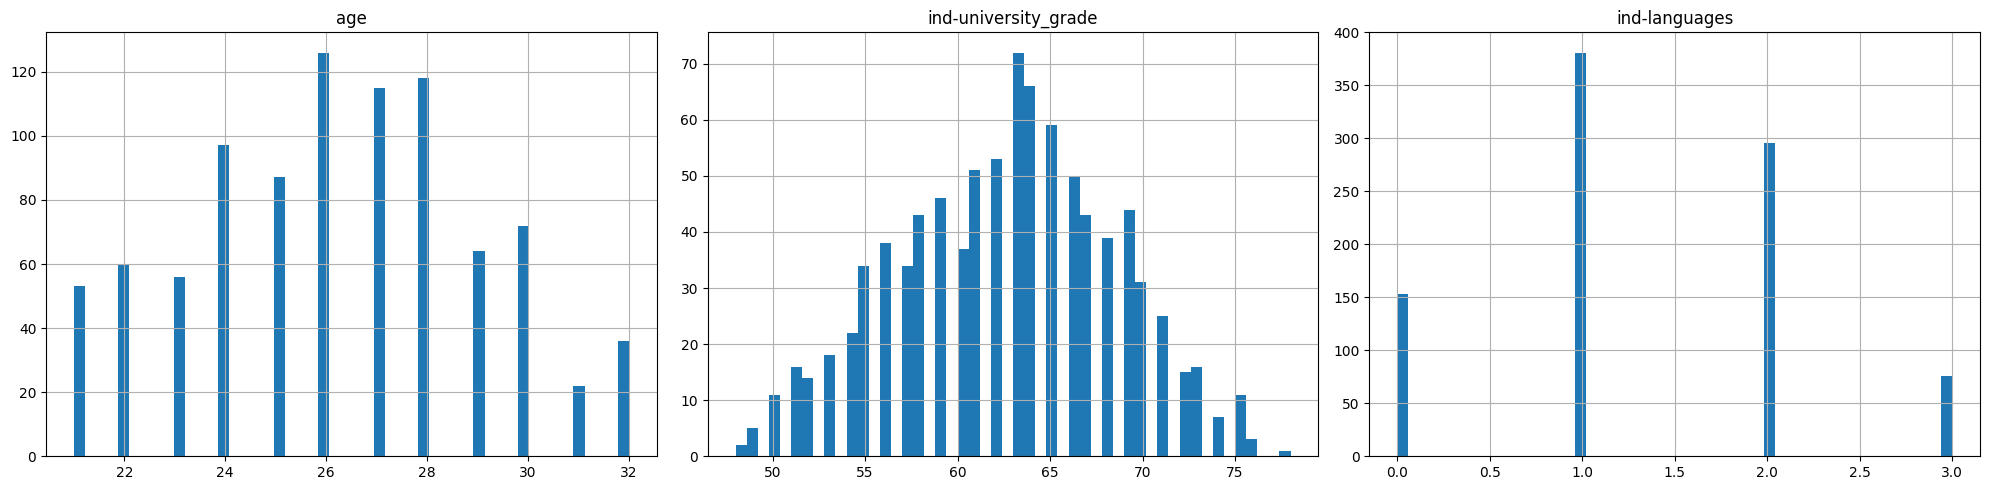

In [21]:
# visualizing the distribution of numerical feature
data.hist(layout=(1,3), bins=50, figsize=(20,5))
plt.tight_layout();
plt.show()

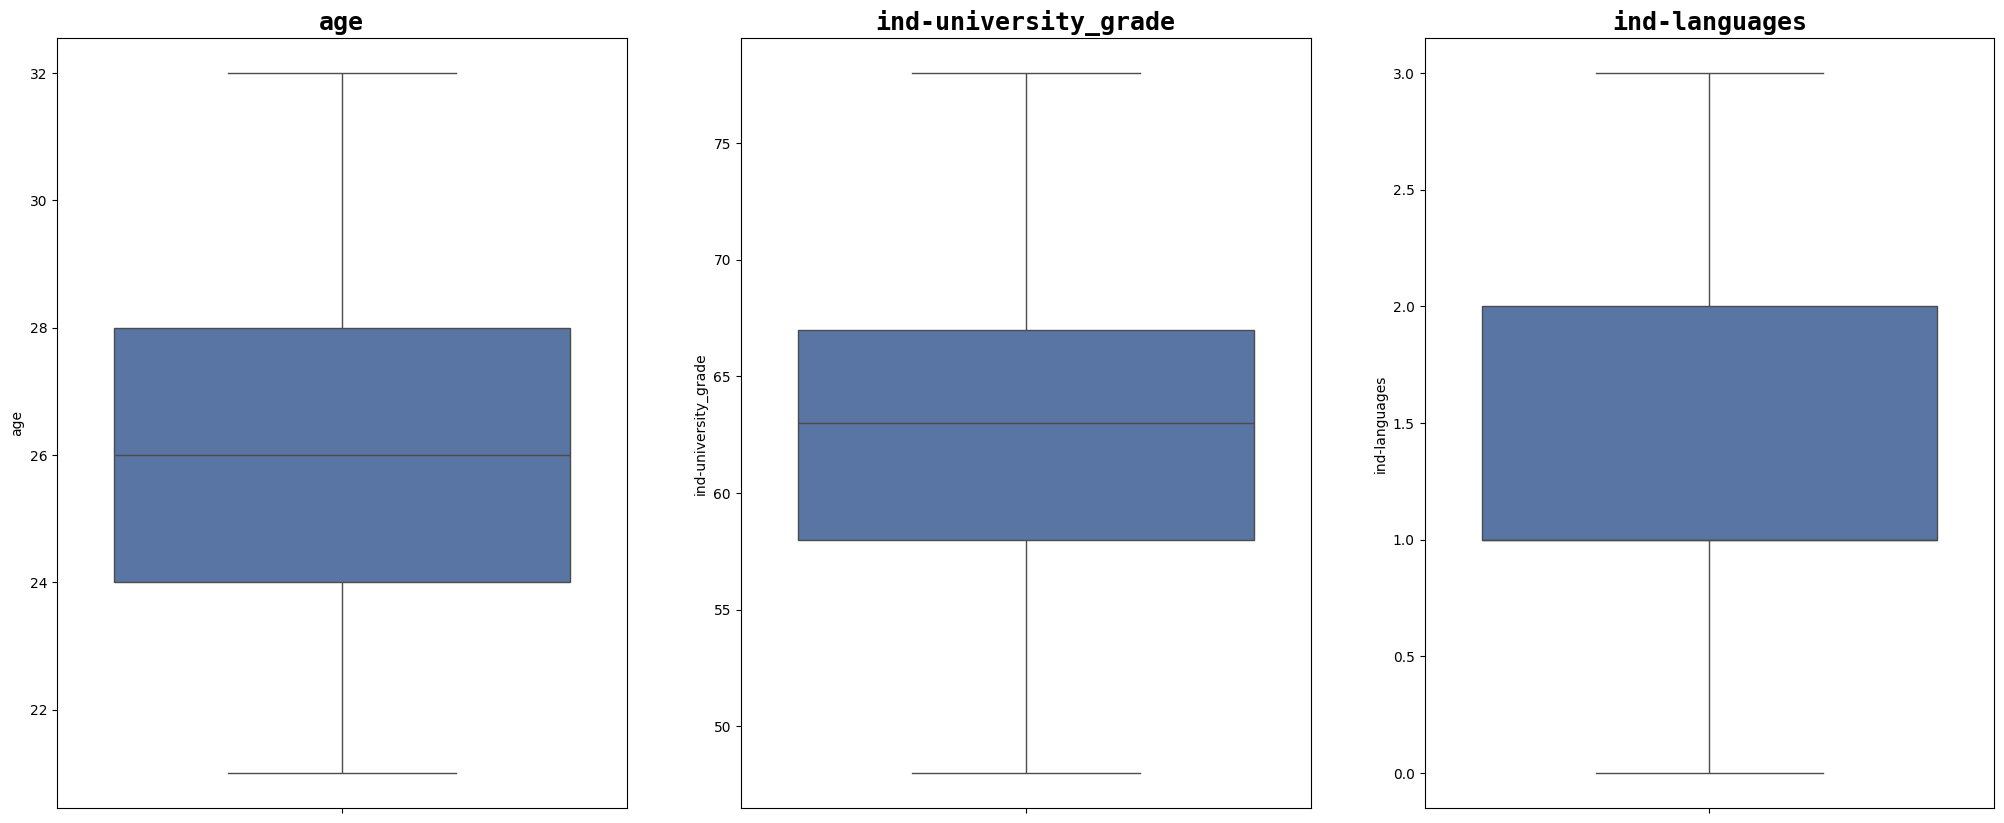

In [22]:
# checking for outliers in the numerical features
fig, ax = plt.subplots(1, 3, figsize = (25, 10))
for i, col in enumerate(num_columns):
    g = sns.boxplot(data=data, y=col, ax = ax[i], palette = "deep")
    g.set_title(col, weight = "bold", fontsize = 18, fontname = "monospace")

## Feature Engineering

In [23]:
# removing unwanted features
old_data = data
data = data.drop('Id', axis=1)
data.head()

,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,decision
0,female,22,Dutch,Tennis,68,False,True,False,False,2,True,master,True
1,female,27,German,Chess,70,False,True,False,False,1,True,master,True
2,male,27,Dutch,Football,65,False,True,False,False,1,True,master,True
3,female,24,Dutch,Tennis,66,True,True,False,True,2,True,bachelor,False
4,male,27,Dutch,Football,55,True,False,False,True,3,False,phd,False


In [24]:
# size of the dataset
data.shape
print('There are {} rows and {} columns in the dataset.'.format(data.shape[0], data.shape[1]))

There are 906 rows and 13 columns in the dataset.


### Data Encoding

In [25]:
# make a list of features to be encoded
col_encode = data.select_dtypes(exclude='number').columns
col_encode = list(col_encode)
col_encode

['gender',
 'nationality',
 'sport',
 'ind-debateclub',
 'ind-programming_exp',
 'ind-international_exp',
 'ind-entrepeneur_exp',
 'ind-exact_study',
 'ind-degree',
 'decision']

In [26]:
#encoding categorical features to numerical
data.replace({False: 0, True: 1}, inplace=True)
data.replace({'female': 0, 'male': 1}, inplace=True)

In [27]:
replace_dict = {
    'German':0, 
    'Dutch': 1, 
    'Belgian': 2
}
data.replace(replace_dict, inplace=True)

In [28]:
replace_dict = {
    'Swimming': 0,
    'Golf': 1,
    'Running': 2,
    'Cricket': 3,
    'Chess': 4,
    'Tennis': 5,
    'Football': 6,
    'Rugby': 7
}
data.replace(replace_dict, inplace=True)

In [29]:
replace_dict = {
    'phd': 0,
    'bachelor': 1,
    'master': 2
}
data.replace(replace_dict, inplace=True)

In [30]:
#displaying the encoded dataset
data.head()

,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,decision
0,0,22,1,5,68,0,1,0,0,2,1,2,1
1,0,27,0,4,70,0,1,0,0,1,1,2,1
2,1,27,1,6,65,0,1,0,0,1,1,2,1
3,0,24,1,5,66,1,1,0,1,2,1,1,0
4,1,27,1,6,55,1,0,0,1,3,0,0,0


In [31]:
data.tail()

,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,decision
912,0,28,1,2,63,0,0,0,0,0,0,2,0
913,0,27,1,5,62,0,0,0,1,2,1,1,0
914,1,24,2,7,60,1,0,0,1,2,0,1,0
915,0,22,1,5,66,0,1,0,0,1,1,1,0
916,1,28,1,6,58,0,0,0,0,1,0,1,0


In [32]:
# checking the data types after encoding
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 906 entries, 0 to 916
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   gender                 906 non-null    int64
 1   age                    906 non-null    int64
 2   nationality            906 non-null    int64
 3   sport                  906 non-null    int64
 4   ind-university_grade   906 non-null    int64
 5   ind-debateclub         906 non-null    int64
 6   ind-programming_exp    906 non-null    int64
 7   ind-international_exp  906 non-null    int64
 8   ind-entrepeneur_exp    906 non-null    int64
 9   ind-languages          906 non-null    int64
 10  ind-exact_study        906 non-null    int64
 11  ind-degree             906 non-null    int64
 12  decision               906 non-null    int64
dtypes: int64(13)
memory usage: 99.1 KB


In [33]:
#display statistical summaries
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,906.0,0.546358,0.498121,0.0,0.0,1.0,1.0,1.0
age,906.0,26.224062,2.855549,21.0,24.0,26.0,28.0,32.0
nationality,906.0,0.996689,0.439726,0.0,1.0,1.0,1.0,2.0
sport,906.0,3.889625,2.538752,0.0,1.0,4.0,6.0,7.0
ind-university_grade,906.0,62.520971,5.892227,48.0,58.0,63.0,67.0,78.0
ind-debateclub,906.0,0.222958,0.416460,0.0,0.0,0.0,0.0,1.0
ind-programming_exp,906.0,0.335541,0.472440,0.0,0.0,0.0,1.0,1.0
ind-international_exp,906.0,0.227373,0.419367,0.0,0.0,0.0,0.0,1.0
ind-entrepeneur_exp,906.0,0.205298,0.404142,0.0,0.0,0.0,0.0,1.0
ind-languages,906.0,1.325607,0.852002,0.0,1.0,1.0,2.0,3.0


In [34]:
#checking for missing values in the new data set
data.isnull().sum()

gender                   0
age                      0
nationality              0
sport                    0
ind-university_grade     0
ind-debateclub           0
ind-programming_exp      0
ind-international_exp    0
ind-entrepeneur_exp      0
ind-languages            0
ind-exact_study          0
ind-degree               0
decision                 0
dtype: int64

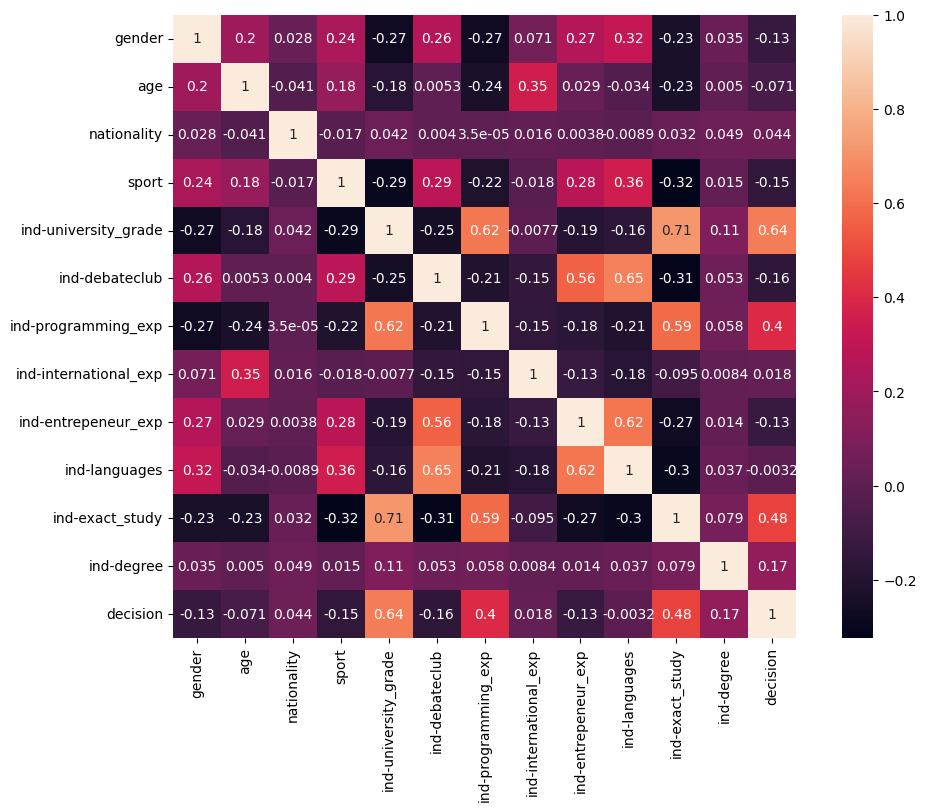

In [35]:
# correlation matrix
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize = (10,8), layout="constrained")
sns.heatmap(corr_matrix, square=True, annot=True, ax=ax)
plt.show()


## Model Development

### Splitting dataset

In [36]:
# predictor variables and outcome
X = data.drop('decision', axis = 1)
Y = data['decision']
X.head()

,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree
0,0,22,1,5,68,0,1,0,0,2,1,2
1,0,27,0,4,70,0,1,0,0,1,1,2
2,1,27,1,6,65,0,1,0,0,1,1,2
3,0,24,1,5,66,1,1,0,1,2,1,1
4,1,27,1,6,55,1,0,0,1,3,0,0


In [37]:
# splitting the data to train and test sets
# 80% for train set and 20% for test set

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=42)
print(X.shape, X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(906, 12) (724, 12) (724,) (182, 12) (182,)


### Feature Scaling | Data Normalization

In [38]:
# data normalization to have a standard scale of measure
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Fitting the model

In [39]:
#creating the decision tree classifier with a linear kernel
model = DecisionTreeClassifier()
model.fit(X_train_scaled, Y_train)

DecisionTreeClassifier()

In [40]:
# evaluating model with train set
Y_train_pred = model.predict(X_train_scaled)
acc = metrics.accuracy_score(Y_train, Y_train_pred)
rec = metrics.recall_score(Y_train, Y_train_pred)
pre = metrics.precision_score(Y_train, Y_train_pred)

#displaying the results
print('Accuracy Score on training set: {}'.format(acc))
print('Recall Score on training set: {}'.format(rec))
print('Precision Score on training set: {}'.format(pre))

Accuracy Score on training set: 1.0
Recall Score on training set: 1.0
Precision Score on training set: 1.0


In [41]:
#evaluating model using test set
Y_test_pred = model.predict(X_test_scaled)
acc = metrics.accuracy_score(Y_test, Y_test_pred)
rec = metrics.recall_score(Y_test, Y_test_pred)
pre = metrics.precision_score(Y_test, Y_test_pred)

#displaying the results
print('Accuracy Score on testing set: {}'.format(acc))
print('Recall Score on testing set: {}'.format(rec))
print('Precision Score on testing set: {}'.format(pre))

Accuracy Score on testing set: 0.8956043956043956
Recall Score on testing set: 0.8571428571428571
Precision Score on testing set: 0.7777777777777778


In [42]:
#displaying classification report on test set
print(metrics.classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       133
           1       0.78      0.86      0.82        49

    accuracy                           0.90       182
   macro avg       0.86      0.88      0.87       182
weighted avg       0.90      0.90      0.90       182



TN=121, FP=12, FN=7, TP=42


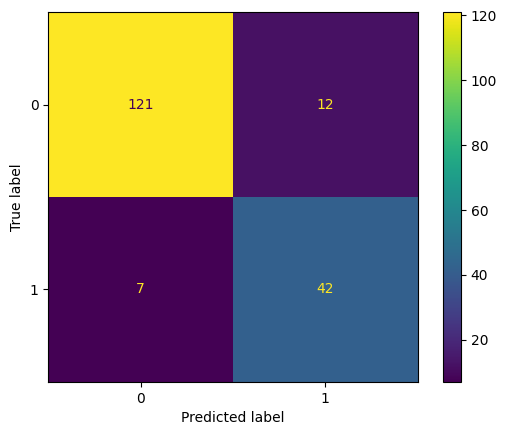

In [43]:
#displaying confusion matrix on test set
cm = metrics.confusion_matrix(Y_test, Y_test_pred)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP,FN, TP))
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

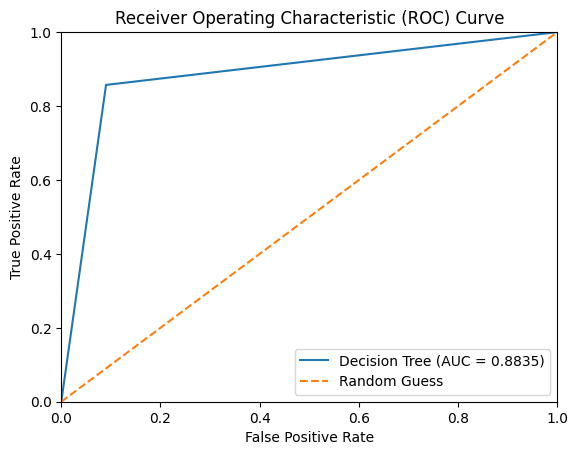

In [44]:
#ROC curve
Y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_prob)
auc = metrics.roc_auc_score(Y_test, Y_pred_prob)
plt.plot(fpr, tpr, label='Decision Tree (AUC = {:.4f})'.format(auc))

plt.plot([0, 1], [0, 1], '--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Splitting by Gender - protected characteristics

In [45]:
# The gender protected characteristic
protected_feature = 'gender'
gender_dist = X_test[protected_feature].value_counts()
print(gender_dist,'\n')

gender
1    106
0     76
Name: count, dtype: int64 



### Female

In [46]:
# Extracting all predictor indices for 'female' from the test set
for_female = 0
female_indices = np.where(X_test[protected_feature] == for_female)[0]
print('female_indices: {}\n'.format(female_indices))

female_indices: [  1   3   4   5   7  12  13  14  16  17  21  27  29  30  31  38  39  41
  42  45  49  50  53  56  61  62  65  66  67  69  75  80  82  87  91  92
  95  96  99 101 104 107 108 110 111 112 117 119 121 124 127 129 132 134
 135 137 139 141 143 144 147 149 150 153 158 161 163 164 165 167 168 172
 174 176 179 181]



In [47]:
# Extracting outcomes using indices for'female' in the Y_test
Y_test_f = [Y_test.values[i] for i in female_indices]
print('Female outcomes: {}\n'.format(Y_test_f))

Female outcomes: [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1]



In [48]:
# Extracting outcomes using indices for 'female' in the Y_test_pred
Y_test_pred_f = [Y_test_pred[i] for i in female_indices]
print('Female predicted outcomes: {}\n'.format(Y_test_pred_f))

Female predicted outcomes: [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1]



TN=47, FP=5, FN=3, TP=21


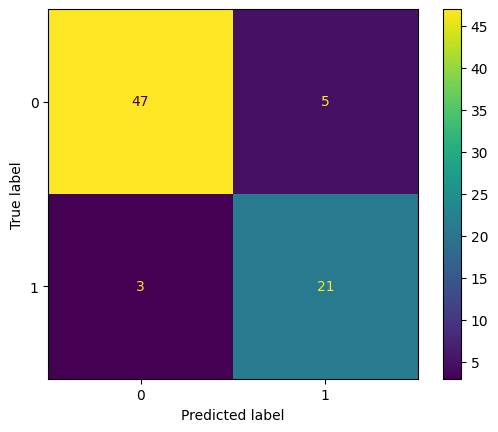

In [49]:
#displaying confusion matrix for female group
cm_f = metrics.confusion_matrix(Y_test_f, Y_test_pred_f)
TN, FP, FN, TP = cm_f.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP,FN, TP))
disp_f = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_f)
disp_f.plot()
plt.show()

In [50]:
#evaluating performance metrics for female group
f_acc = metrics.accuracy_score(Y_test_f, Y_test_pred_f)
f_rec = metrics.recall_score(Y_test_f, Y_test_pred_f)
f_pre = metrics.precision_score(Y_test_f, Y_test_pred_f)
f_pos = (TP+FP)/(TP+TN+FP+FN)

print('Accuracy Score for female group is {} - {}%'.format(f_acc, round(f_acc * 100)))
print('Recall Score for female group is {} - {}%'.format(f_rec, round(f_rec * 100)))
print('Precision Score for female group is {} - {}%'.format(f_pre, round(f_pre * 100)))
print('Positive Rate for female group is {} - {}%'.format(f_pos, round(f_pos * 100)))

Accuracy Score for female group is 0.8947368421052632 - 89%
Recall Score for female group is 0.875 - 88%
Precision Score for female group is 0.8076923076923077 - 81%
Positive Rate for female group is 0.34210526315789475 - 34%


### Male

In [51]:
# Extracting all predictor indices for 'male' from the test set
for_male = 1
male_indices = np.where(X_test[protected_feature] == for_male)[0]
print('Male indices: {}'.format(male_indices))

Male indices: [  0   2   6   8   9  10  11  15  18  19  20  22  23  24  25  26  28  32
  33  34  35  36  37  40  43  44  46  47  48  51  52  54  55  57  58  59
  60  63  64  68  70  71  72  73  74  76  77  78  79  81  83  84  85  86
  88  89  90  93  94  97  98 100 102 103 105 106 109 113 114 115 116 118
 120 122 123 125 126 128 130 131 133 136 138 140 142 145 146 148 151 152
 154 155 156 157 159 160 162 166 169 170 171 173 175 177 178 180]


In [52]:
# Extracting outcomes using indices for 'male' in the Y_test
Y_test_m = [Y_test.values[i] for i in male_indices]
print('Male outcomes: {}'.format(Y_test_m))

Male outcomes: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]


In [53]:
# Extracting outcomes using indices for 'male' in the Y_test_pred
Y_test_pred_m = [Y_test_pred[i] for i in male_indices]
print('Male predicted outcomes: {}'.format(Y_test_pred_m))

Male predicted outcomes: [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]


TN=74, FP=7, FN=4, TP=21


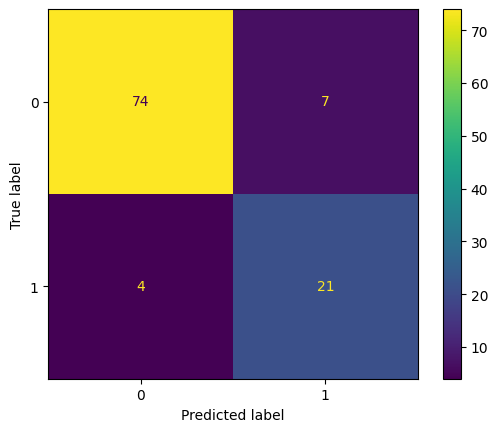

In [54]:
#displaying confusion matrix for malel group
cm_m = metrics.confusion_matrix(Y_test_m, Y_test_pred_m)
TN, FP, FN, TP = cm_m.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP,FN, TP))
disp_m = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_m)
disp_m.plot()
plt.show()

In [55]:
#evaluating performance metrics for male group
m_acc = metrics.accuracy_score(Y_test_m, Y_test_pred_m)
m_rec = metrics.recall_score(Y_test_m, Y_test_pred_m)
m_pre = metrics.precision_score(Y_test_m, Y_test_pred_m)
m_pos = (TP+FP)/(TP+TN+FP+FN)

print('Accuracy Score for male group is {} - {}%'.format(m_acc, round(m_acc * 100)))
print('Recall Score for male group is {} - {}%'.format(m_rec, round(m_rec * 100)))
print('Precision Score for male group is {} - {}%'.format(m_pre, round(m_pre * 100)))
print('Positive Rate for male group is {} - {}%'.format(m_pos, round(m_pos * 100)))

Accuracy Score for male group is 0.8962264150943396 - 90%
Recall Score for male group is 0.84 - 84%
Precision Score for male group is 0.75 - 75%
Positive Rate for male group is 0.2641509433962264 - 26%


## Model Optimization

### Applying sampling technique to balance the dataset based on the protected feature

In [56]:
# using SMOTE to balance the dataset based on the feature of focus -  gender
from imblearn.over_sampling import SMOTE

In [57]:
# splitting dataset for predictor variables and target 
# to avoid having synthetic data in the train set after sampling gender
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=42)

In [58]:
# merge both target[decision] and predictors. Split by gender protected feature and apply sampling
X_full = X_train.merge(Y_train.to_frame(), left_index=True, right_index=True)

# split gender [protected] feature to apply sampling
X_new = X_full.drop('gender', axis=1)
X_gen = X_full['gender']

In [59]:
# Apply SMOTE to gender on train set
smote =  SMOTE(random_state=42)
X_new_resampled,X_gen_resampled = smote.fit_resample(X_new, X_gen)

In [60]:
#join both
X_all = X_new_resampled.merge(X_gen_resampled.to_frame(), left_index=True, right_index=True)

#reassign to train set and split target
X_train_resampled = X_all.drop('decision', axis=1)
Y_train_resampled = X_all['decision']

#move gender back to its original position
X_train_cols = list(data.columns)
X_train_cols.pop()
X_train_resampled = X_all[X_train_cols]

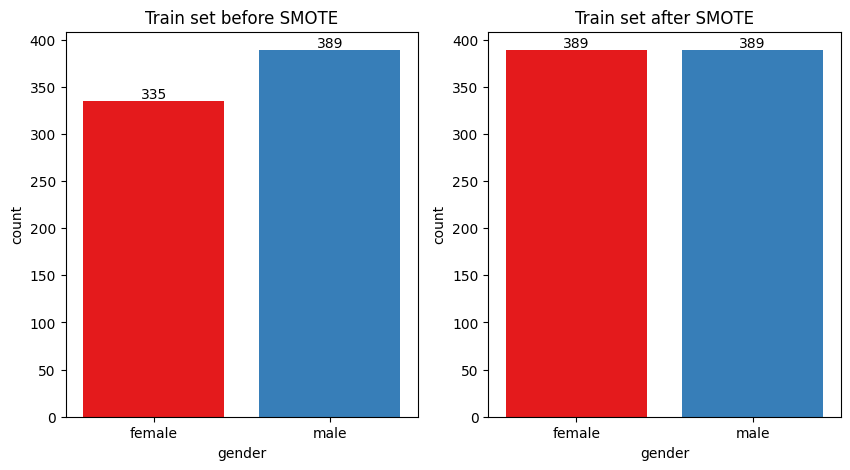

In [61]:
# visualizing the distribution of gender feature in the train set before and after SMOTE
fig, ax = plt.subplots(ncols = 2, figsize=(10, 5))
sns.countplot(x='gender', data=X_train, saturation = 1, palette = "Set1", ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].bar_label(ax[0].containers[1])
ax[0].set_title('Train set before SMOTE')
ax[0].set_xticklabels(['female', 'male'])

sns.countplot(x='gender', data=pd.DataFrame(X_gen_resampled, columns=['gender']), saturation = 1, palette = "Set1", ax=ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].bar_label(ax[1].containers[1])
ax[1].set_title('Train set after SMOTE')
ax[1].set_xticklabels(['female', 'male'])


plt.show()

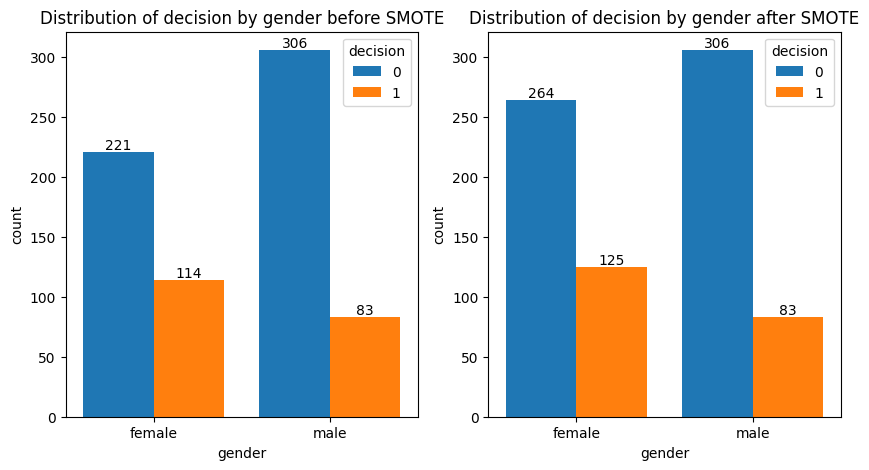

In [62]:
# visualizing the distribution of gender feature in the train set before and after SMOTE
fig, ax = plt.subplots(ncols = 2, figsize=(10, 5))
sns.countplot(x='gender', data=X_full, hue='decision', saturation = 1, ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].bar_label(ax[0].containers[1])
ax[0].set_title('Distribution of decision by gender before SMOTE')
ax[0].set_xticklabels(['female', 'male'])

sns.countplot(x='gender', data=X_all, hue='decision', saturation = 1, ax=ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].bar_label(ax[1].containers[1])
ax[1].set_title('Distribution of decision by gender after SMOTE')
ax[1].set_xticklabels(['female', 'male'])

plt.show()

In [63]:
# data normalization to have a standard scale of measure
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [64]:
print(X_train_resampled.shape, X_test_scaled.shape, Y_train_resampled.shape, Y_test.shape)

(778, 12) (182, 12) (778,) (182,)


### Cross Validation

In [65]:
# Perform k-fold cross-validation with k=10 for the model
kf = KFold(n_splits=10, shuffle=True, random_state=42)
model = DecisionTreeClassifier(random_state=42)
cv_results = cross_val_score(model, X_train_scaled, Y_train_resampled, cv=kf)
print('Accuracy for the model: {}'.format(cv_results))
print('Average accuracy for the model: {}'.format(cv_results.mean()))

Accuracy for the model: [0.92307692 0.8974359  0.92307692 0.83333333 0.8974359  0.91025641
 0.88461538 0.87179487 0.94805195 0.92207792]
Average accuracy for the model: 0.901115551115551


### Hyperparameter tuning

In [66]:
# fit model to resampled train set
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, Y_train_resampled)

# prediction on scaled test set
Y_pred = model.predict(X_test_scaled)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print('Model Accuracy: {}'.format(accuracy))

Model Accuracy: 0.8956043956043956


In [67]:
# Defining the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

In [68]:
# Creating the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf)

# Fit the model with the grid of hyperparameters, using resampled train set
grid_search.fit(X_train_scaled, Y_train_resampled)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
#best_model = grid_search.best_estimator_

best_model = DecisionTreeClassifier(**grid_search.best_params_)
best_model.fit(X_train_scaled, Y_train_resampled)

print('Best Hyperparameters for the model: {}'.format(best_params))

Best Hyperparameters for the model: {'max_depth': 3, 'min_samples_split': 2}


In [69]:
# Evaluating the best model on train set
Y_train_pred = best_model.predict(X_train_scaled)
best_train_acc = metrics.accuracy_score(Y_train_resampled, Y_train_pred)
best_train_rec = metrics.recall_score(Y_train_resampled, Y_train_pred)
best_train_pre = metrics.precision_score(Y_train_resampled, Y_train_pred)

print('Best train set accuracy: {}'.format(best_train_acc))
print('Best train set recall: {}'.format(best_train_rec))
print('Best train set precision: {}'.format(best_train_pre))

Best train set accuracy: 0.9267352185089974
Best train set recall: 0.9663461538461539
Best train set precision: 0.8007968127490039


In [70]:
# Evaluating the best model on test set
Y_test_pred = best_model.predict(X_test_scaled)
best_test_acc = metrics.accuracy_score(Y_test, Y_test_pred)
best_test_rec = metrics.recall_score(Y_test, Y_test_pred)
best_test_pre = metrics.precision_score(Y_test, Y_test_pred)

print('Best test set accuracy: {}'.format(best_test_acc))
print('Best test set recall: {}'.format(best_test_rec))
print('Best test set precision: {}'.format(best_test_pre))

Best test set accuracy: 0.9395604395604396
Best test set recall: 1.0
Best test set precision: 0.8166666666666667


In [71]:
#displaying classification report on test set for the improved model
print(metrics.classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       133
           1       0.82      1.00      0.90        49

    accuracy                           0.94       182
   macro avg       0.91      0.96      0.93       182
weighted avg       0.95      0.94      0.94       182



TN=122, FP=11, FN=0, TP=49


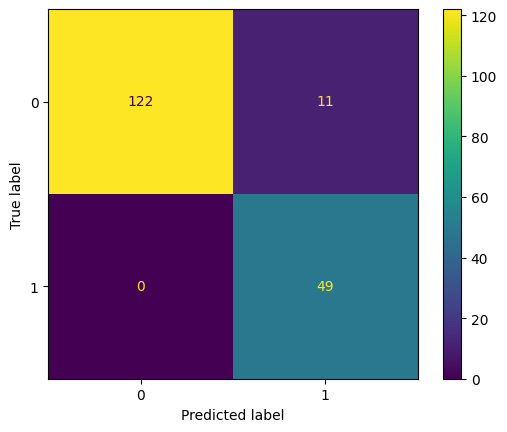

In [72]:
#displaying confusion matrix on test set
cm = metrics.confusion_matrix(Y_test, Y_test_pred)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP,FN, TP))
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

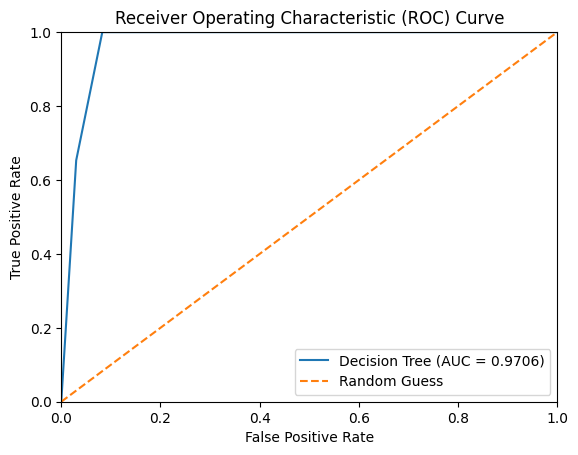

In [73]:
#ROC curve
Y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_prob)
auc = metrics.roc_auc_score(Y_test, Y_pred_prob)
plt.plot(fpr, tpr, label='Decision Tree (AUC = {:.4f})'.format(auc))

plt.plot([0, 1], [0, 1], '--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Model Explanation

#### Feature Importance

                  Feature  Importance
0                  gender    0.000000
1                     age    0.000000
2             nationality    0.000000
5          ind-debateclub    0.000000
6     ind-programming_exp    0.000000
7   ind-international_exp    0.000000
8     ind-entrepeneur_exp    0.000000
10        ind-exact_study    0.000000
3                   sport    0.003983
11             ind-degree    0.052762
9           ind-languages    0.157401
4    ind-university_grade    0.785853


<Axes: title={'center': 'Feature importance for the model'}, ylabel='Feature'>

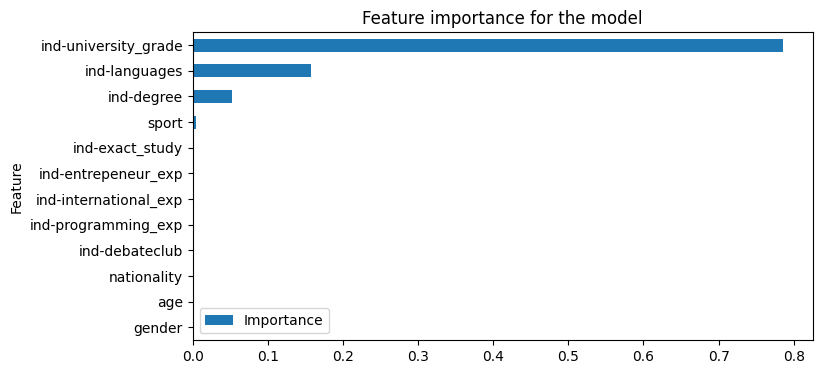

In [74]:
# feature importance on the BEST Decision Tree classifier
importance = best_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
print(feature_importance)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(8, 4), title='Feature importance for the model')

#### SHAP

In [75]:
import shap

#converting scaled test data back to a DF with columns
test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [76]:
# Produce the SHAP values
dt_explainer = shap.Explainer(best_model.predict, test_df)
dt_shap_values = dt_explainer(test_df)

PermutationExplainer explainer: 183it [00:15,  6.07it/s]                                                               


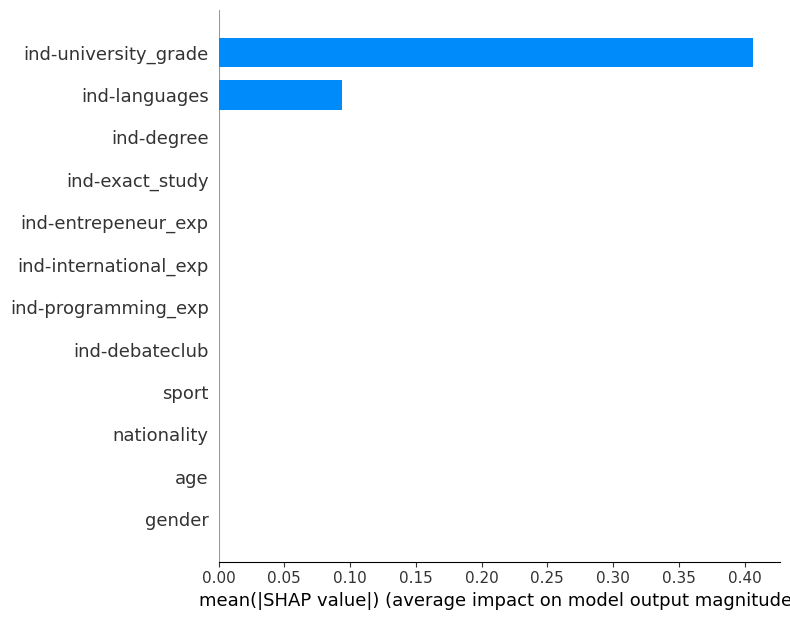

In [77]:
shap.summary_plot(dt_shap_values, test_df, plot_type="bar")

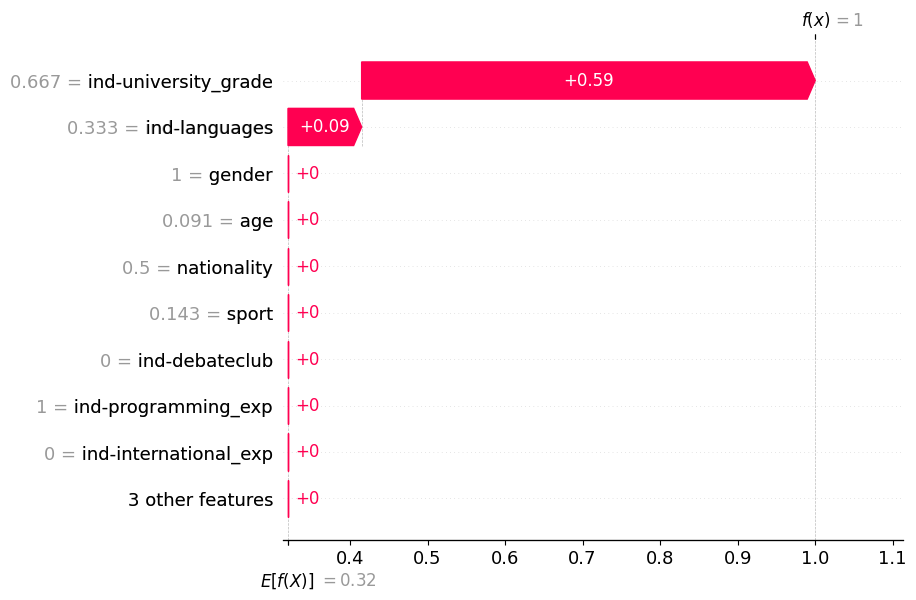

In [78]:
shap.plots.waterfall(dt_shap_values[0])

### Splitting by Gender - protected characteristics

In [79]:
# The gender protected characteristic
protected_feature = 'gender'
gender_dist = X_test[protected_feature].value_counts()
print(gender_dist,'\n')

gender
1    106
0     76
Name: count, dtype: int64 



#### Female

In [80]:
# Extracting all predictor indices for 'female' from the test set
for_female = 0
female_indices = np.where(X_test[protected_feature] == for_female)[0]
print('female_indices: {}\n'.format(female_indices))

female_indices: [  1   3   4   5   7  12  13  14  16  17  21  27  29  30  31  38  39  41
  42  45  49  50  53  56  61  62  65  66  67  69  75  80  82  87  91  92
  95  96  99 101 104 107 108 110 111 112 117 119 121 124 127 129 132 134
 135 137 139 141 143 144 147 149 150 153 158 161 163 164 165 167 168 172
 174 176 179 181]



In [81]:
# Extracting outcomes using indices for'female' in the Y_test
Y_test_f = [Y_test.values[i] for i in female_indices]
print('Female outcomes: {}\n'.format(Y_test_f))

Female outcomes: [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1]



In [82]:
# Extracting outcomes using indices for 'female' in the Y_test_pred
Y_test_pred_f = [Y_test_pred[i] for i in female_indices]
print('Female predicted outcomes: {}\n'.format(Y_test_pred_f))

Female predicted outcomes: [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1]



TN=50, FP=2, FN=0, TP=24


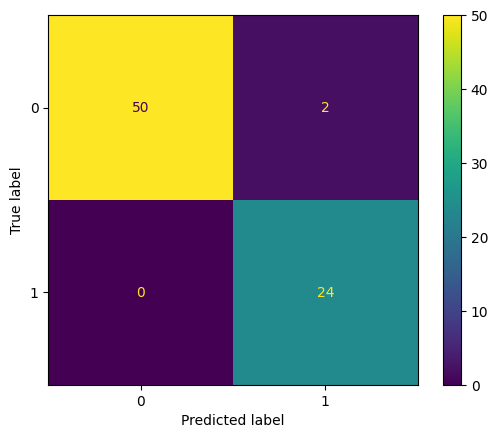

In [83]:
#displaying confusion matrix for female group
cm_f = metrics.confusion_matrix(Y_test_f, Y_test_pred_f)
TN, FP, FN, TP = cm_f.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP,FN, TP))
disp_f = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_f)
disp_f.plot()
plt.show()

In [84]:
#evaluating performance metrics for female group
f_acc = metrics.accuracy_score(Y_test_f, Y_test_pred_f)
f_rec = metrics.recall_score(Y_test_f, Y_test_pred_f)
f_pre = metrics.precision_score(Y_test_f, Y_test_pred_f)
f_pos = (TP+FP)/(TP+TN+FP+FN)

print('Accuracy Score for female group is {} - {}%'.format(f_acc, round(f_acc * 100)))
print('Recall Score for female group is {} - {}%'.format(f_rec, round(f_rec * 100)))
print('Precision Score for female group is {} - {}%'.format(f_pre, round(f_pre * 100)))
print('Positive Rate for female group is {} - {}%'.format(f_pos, round(f_pos * 100)))

Accuracy Score for female group is 0.9736842105263158 - 97%
Recall Score for female group is 1.0 - 100%
Precision Score for female group is 0.9230769230769231 - 92%
Positive Rate for female group is 0.34210526315789475 - 34%


#### Male

In [85]:
# Extracting all predictor indices for 'male' from the test set
for_male = 1
male_indices = np.where(X_test[protected_feature] == for_male)[0]
print('Male indices: {}'.format(male_indices))

Male indices: [  0   2   6   8   9  10  11  15  18  19  20  22  23  24  25  26  28  32
  33  34  35  36  37  40  43  44  46  47  48  51  52  54  55  57  58  59
  60  63  64  68  70  71  72  73  74  76  77  78  79  81  83  84  85  86
  88  89  90  93  94  97  98 100 102 103 105 106 109 113 114 115 116 118
 120 122 123 125 126 128 130 131 133 136 138 140 142 145 146 148 151 152
 154 155 156 157 159 160 162 166 169 170 171 173 175 177 178 180]


In [86]:
# Extracting outcomes using indices for 'male' in the Y_test
Y_test_m = [Y_test.values[i] for i in male_indices]
print('Male outcomes: {}'.format(Y_test_m))

Male outcomes: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]


In [87]:
# Extracting outcomes using indices for 'male' in the Y_test_pred
Y_test_pred_m = [Y_test_pred[i] for i in male_indices]
print('Male predicted outcomes: {}'.format(Y_test_pred_m))

Male predicted outcomes: [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]


TN=72, FP=9, FN=0, TP=25


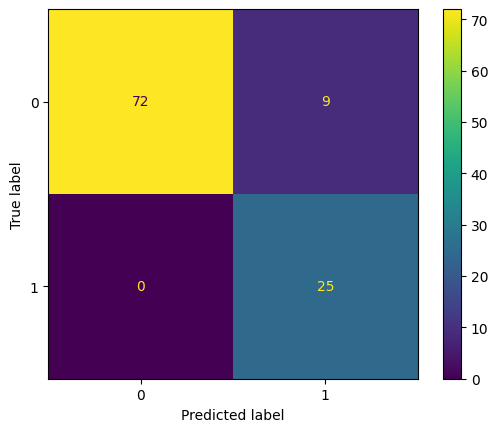

In [88]:
#displaying confusion matrix for malel group
cm_m = metrics.confusion_matrix(Y_test_m, Y_test_pred_m)
TN, FP, FN, TP = cm_m.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP,FN, TP))
disp_m = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_m)
disp_m.plot()
plt.show()

In [89]:
#evaluating performance metrics for male group
m_acc = metrics.accuracy_score(Y_test_m, Y_test_pred_m)
m_rec = metrics.recall_score(Y_test_m, Y_test_pred_m)
m_pre = metrics.precision_score(Y_test_m, Y_test_pred_m)
m_pos = (TP+FP)/(TP+TN+FP+FN)

print('Accuracy Score for male group is {} - {}%'.format(m_acc, round(m_acc * 100)))
print('Recall Score for male group is {} - {}%'.format(m_rec, round(m_rec * 100)))
print('Precision Score for male group is {} - {}%'.format(m_pre, round(m_pre * 100)))
print('Positive Rate for male group is {} - {}%'.format(m_pos, round(m_pos * 100)))

Accuracy Score for male group is 0.9150943396226415 - 92%
Recall Score for male group is 1.0 - 100%
Precision Score for male group is 0.7352941176470589 - 74%
Positive Rate for male group is 0.32075471698113206 - 32%
